# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)


# Part A

In [2]:
def random_walk_flat(N, M, a=-1, b=1):
    steps = np.random.uniform(a, b, size=(M, N))
    positions = np.cumsum(steps, axis=1)
    mean_xN = positions[:, -1].mean()
    variance_xN = positions[:, -1].var()
    return mean_xN, variance_xN, positions

N = 1000  # Number of steps
M = 10000  # Number of random walks
mean_xN_A, variance_xN_A, positions_A = random_walk_flat(N, M)

print(f"Part A - Mean: {mean_xN_A}, Variance: {variance_xN_A}")


Part A - Mean: -0.01503923274652651, Variance: 327.4743428177305


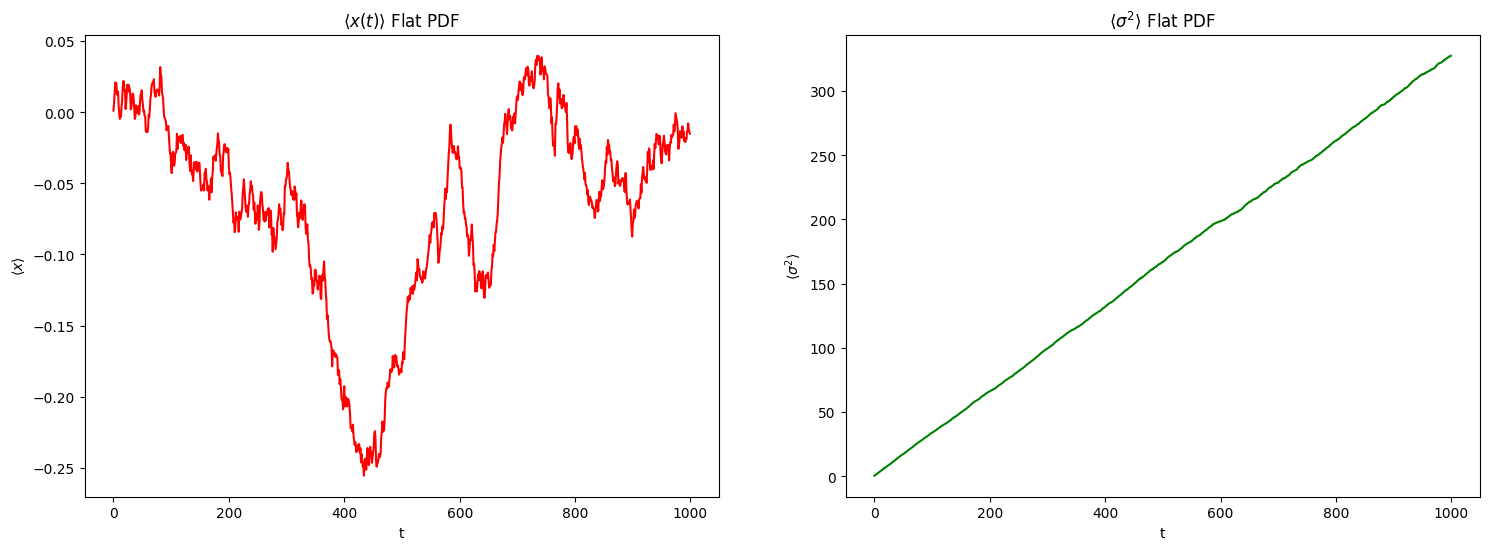

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(positions_A.mean(axis=0), color="r")
axes[0].set_title(r"$\langle x(t) \rangle$ Flat PDF")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(positions_A.var(axis=0), color="g")
axes[1].set_title(r"$\langle \sigma^2 \rangle$ Flat PDF")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

# Part B

In [4]:
def random_walk_gaussian(N, M, sigma):
    steps = np.random.normal(0, sigma, size=(M, N))
    positions = np.cumsum(steps, axis=1)
    mean_xN = positions[:, -1].mean()
    variance_xN = positions[:, -1].var()
    return mean_xN, variance_xN, positions

sigma_values = [0.1, 1, 10]
for sigma in sigma_values:
    mean_xN_B, variance_xN_B, positions_B = random_walk_gaussian(N, M, sigma)
    print(f"Part B (σ={sigma}) - Mean: {mean_xN_B}, Variance: {variance_xN_B}")


Part B (σ=0.1) - Mean: 0.006172746592905924, Variance: 9.937836450644669
Part B (σ=1) - Mean: -0.24633400155045032, Variance: 992.1317197549917
Part B (σ=10) - Mean: -2.6359027242997572, Variance: 100722.61869047175


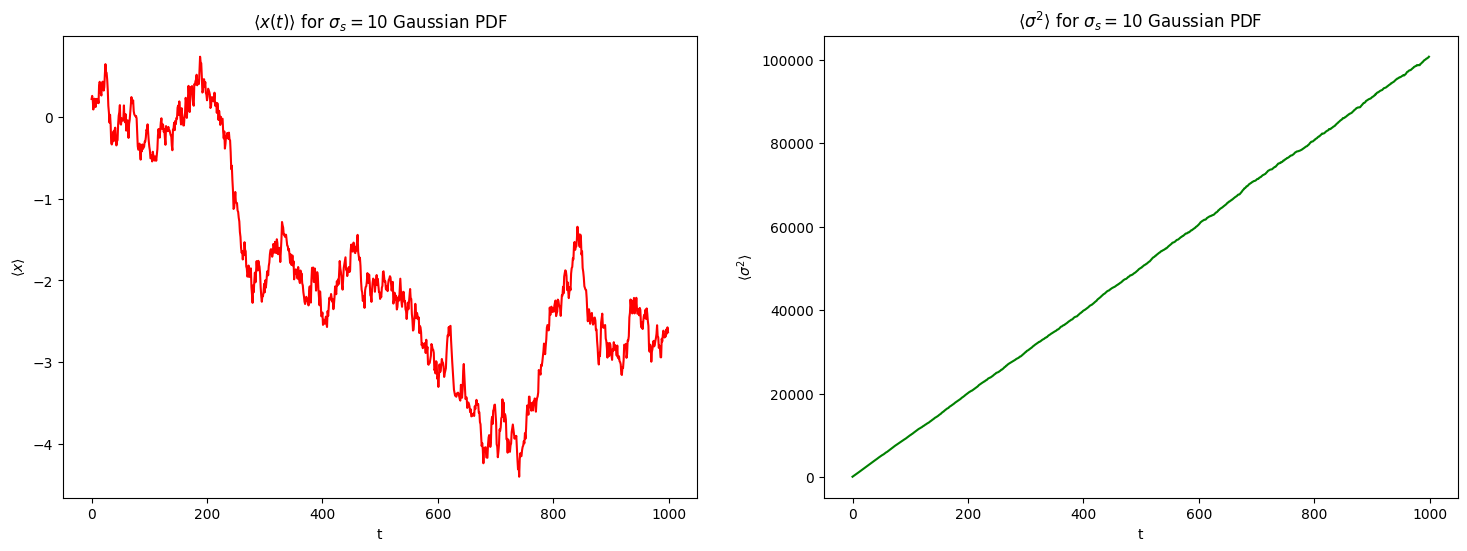

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(positions_B.mean(axis=0), color="r")
axes[0].set_title(r"$\langle x(t) \rangle$ for $\sigma_s=10$ Gaussian PDF")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(positions_B.var(axis=0), color="g")
axes[1].set_title(r"$\langle \sigma^2 \rangle$ for $\sigma_s=10$ Gaussian PDF")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

# Part C

In [6]:
def random_walk_custom_pdf(N, M, s_range=(0.01, 4), p_forward=0.3):
    # Step 1: Define the custom PDF for s ∈ [0.01, 4]
    s_values = np.linspace(*s_range, 10000)  # Avoid s=0 by starting from a small positive value
    pdf = np.tanh(s_values) / s_values       # Custom PDF
    pdf[np.isnan(pdf)] = 1                 # Handle division by zero (assign 1 at s=0)
    pdf /= np.trapz(pdf, s_values)          # Normalize the PDF

    # Simulate the random walk
    steps = np.zeros((M, N))  # Array to store steps for all walks
    for i in range(M):
        for j in range(N):
            # Decide direction: forward or backward
            direction = 1 if np.random.rand() < p_forward else -1
            # Sample a step size from the PDF (positive steps only)
            step = np.random.choice(s_values, p=pdf / pdf.sum())
            steps[i, j] = direction * step

    # Compute cumulative positions
    positions = np.cumsum(steps, axis=1)

    # Calculate mean and variance
    mean_xN = positions[:, -1].mean()
    variance_xN = positions[:, -1].var()

    return mean_xN, variance_xN, positions


In [7]:
N = 1000  # Number of steps
M = 100  # Number of random walks
mean_xN_C, variance_xN_C, positions_C = random_walk_custom_pdf(N, M, p_forward=0.3)

print(f"Mean: {mean_xN_C}, Variance: {variance_xN_C}")


Mean: -598.0101318931893, Variance: 3047.323088239731


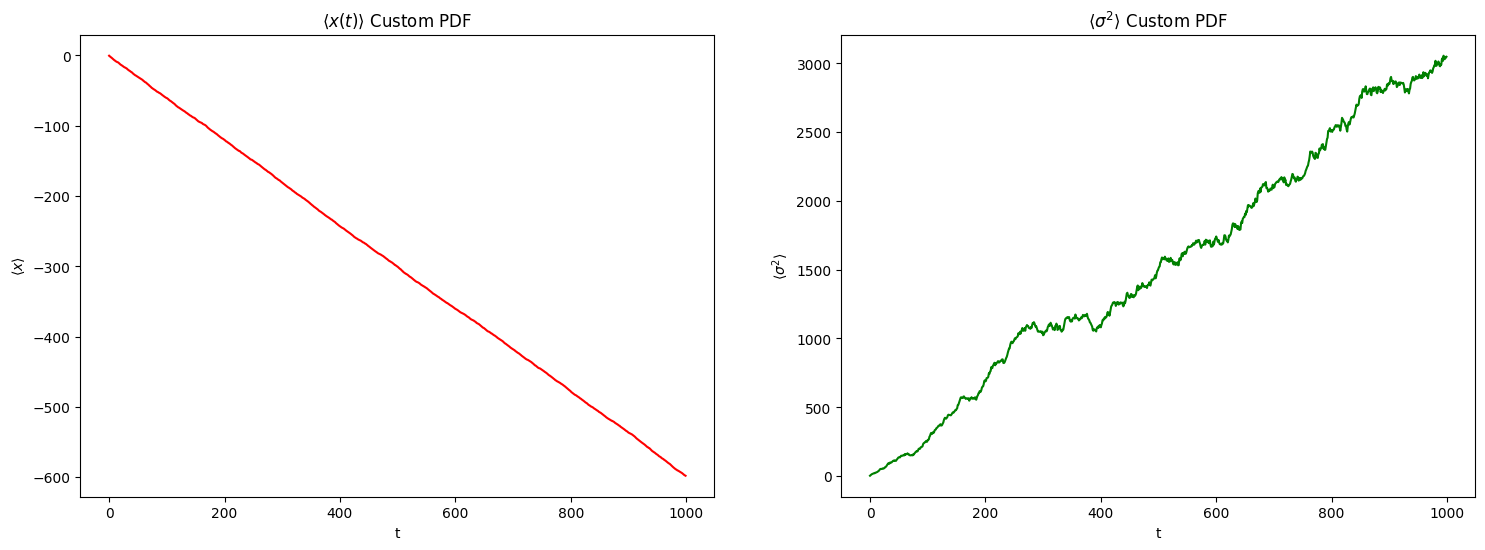

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(positions_C.mean(axis=0), color="r")
axes[0].set_title(r"$\langle x(t) \rangle$ Custom PDF ")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(positions_C.var(axis=0), color="g")
axes[1].set_title(r"$\langle \sigma^2 \rangle$ Custom PDF ")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

# Part D & E

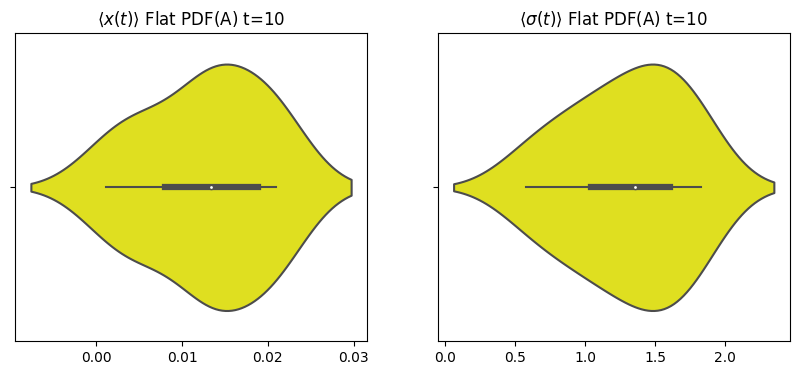

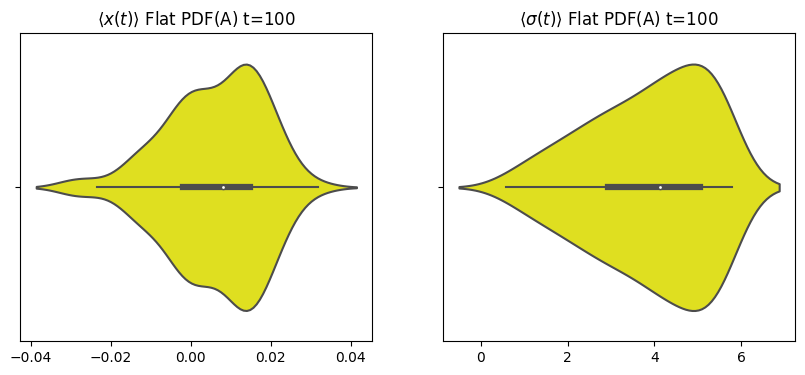

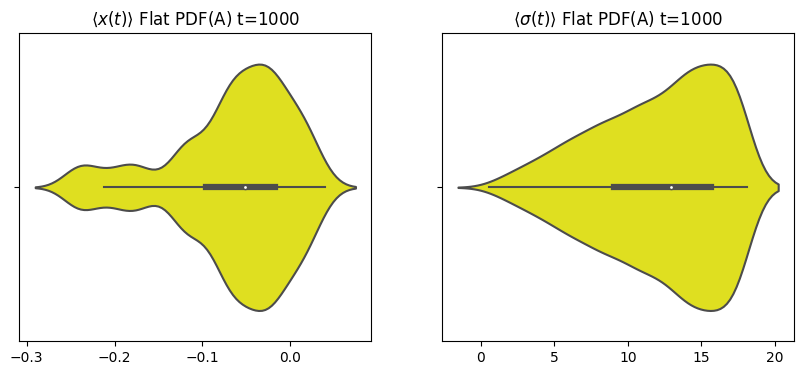

In [13]:
times = [10, 100, 1000]
for t in times: 
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.violinplot(x=positions_A.mean(axis=0)[:t], ax=axes[0], color="yellow")
    axes[0].set_title(r"$\langle x(t) \rangle$ Flat PDF(A) "f"t={t}")
    
    sns.violinplot(x=positions_A.std(axis=0)[:t], ax=axes[1], color="yellow")
    axes[1].set_title(r"$\langle \sigma(t) \rangle$ Flat PDF(A) "f"t={t}")
    
plt.show()


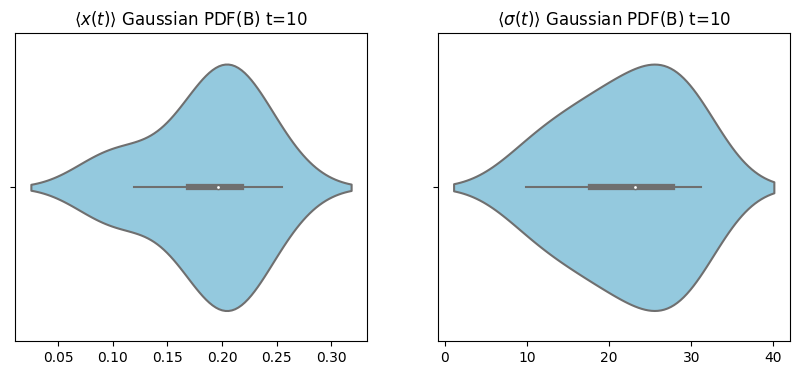

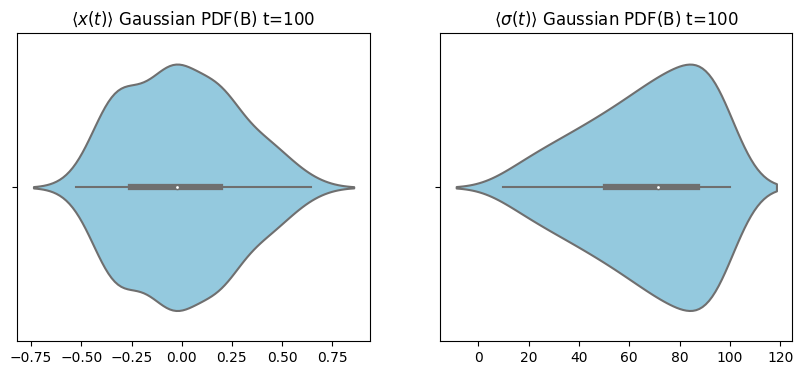

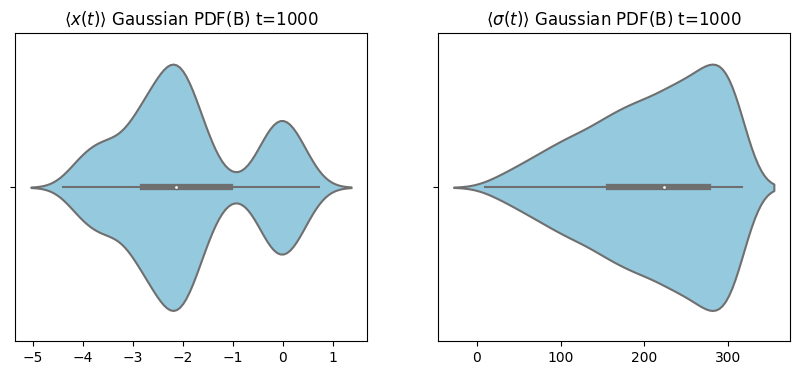

In [14]:

for t in times: 
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.violinplot(x=positions_B.mean(axis=0)[:t], ax=axes[0], color="skyblue")
    axes[0].set_title(r"$\langle x(t) \rangle$ Gaussian PDF(B) "f"t={t}")
    
    sns.violinplot(x=positions_B.std(axis=0)[:t], ax=axes[1], color="skyblue")
    axes[1].set_title(r"$\langle \sigma(t) \rangle$ Gaussian PDF(B) "f"t={t}")
    
plt.show()


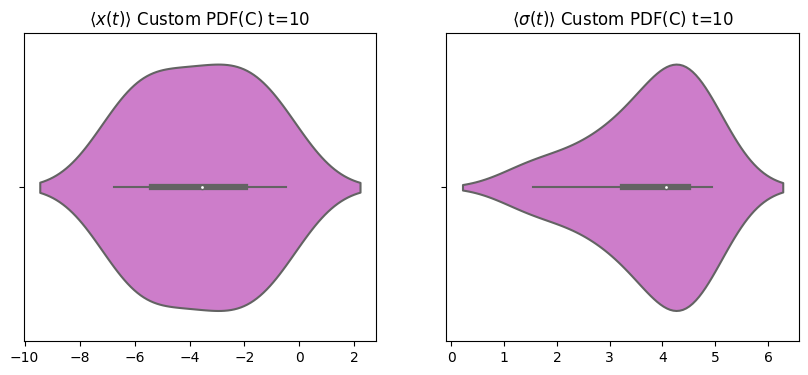

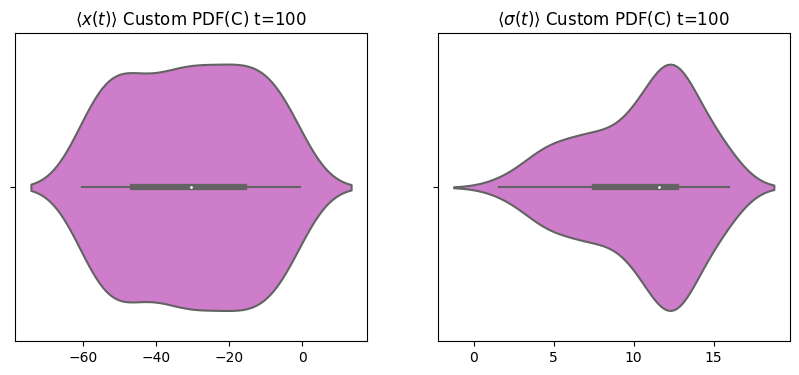

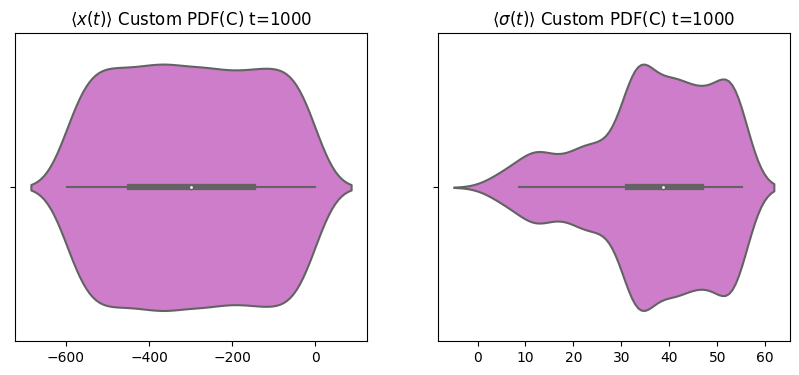

In [15]:

for t in times: 
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.violinplot(x=positions_C.mean(axis=0)[:t], ax=axes[0], color="orchid")
    axes[0].set_title(r"$\langle x(t) \rangle$ Custom PDF(C) "f"t={t}")
    
    sns.violinplot(x=positions_C.std(axis=0)[:t], ax=axes[1], color="orchid")
    axes[1].set_title(r"$\langle \sigma(t) \rangle$ Custom PDF(C) "f"t={t}")
    
plt.show()


## Explaination of the results
for flat pdf 𝑥(𝑡) will be symmetric, centered around zero, with increasing spread as 𝑡t increases.
The variance plot, $⟨𝜎^2(𝑡)⟩$, shows a linearly increasing trend.

# Part F

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

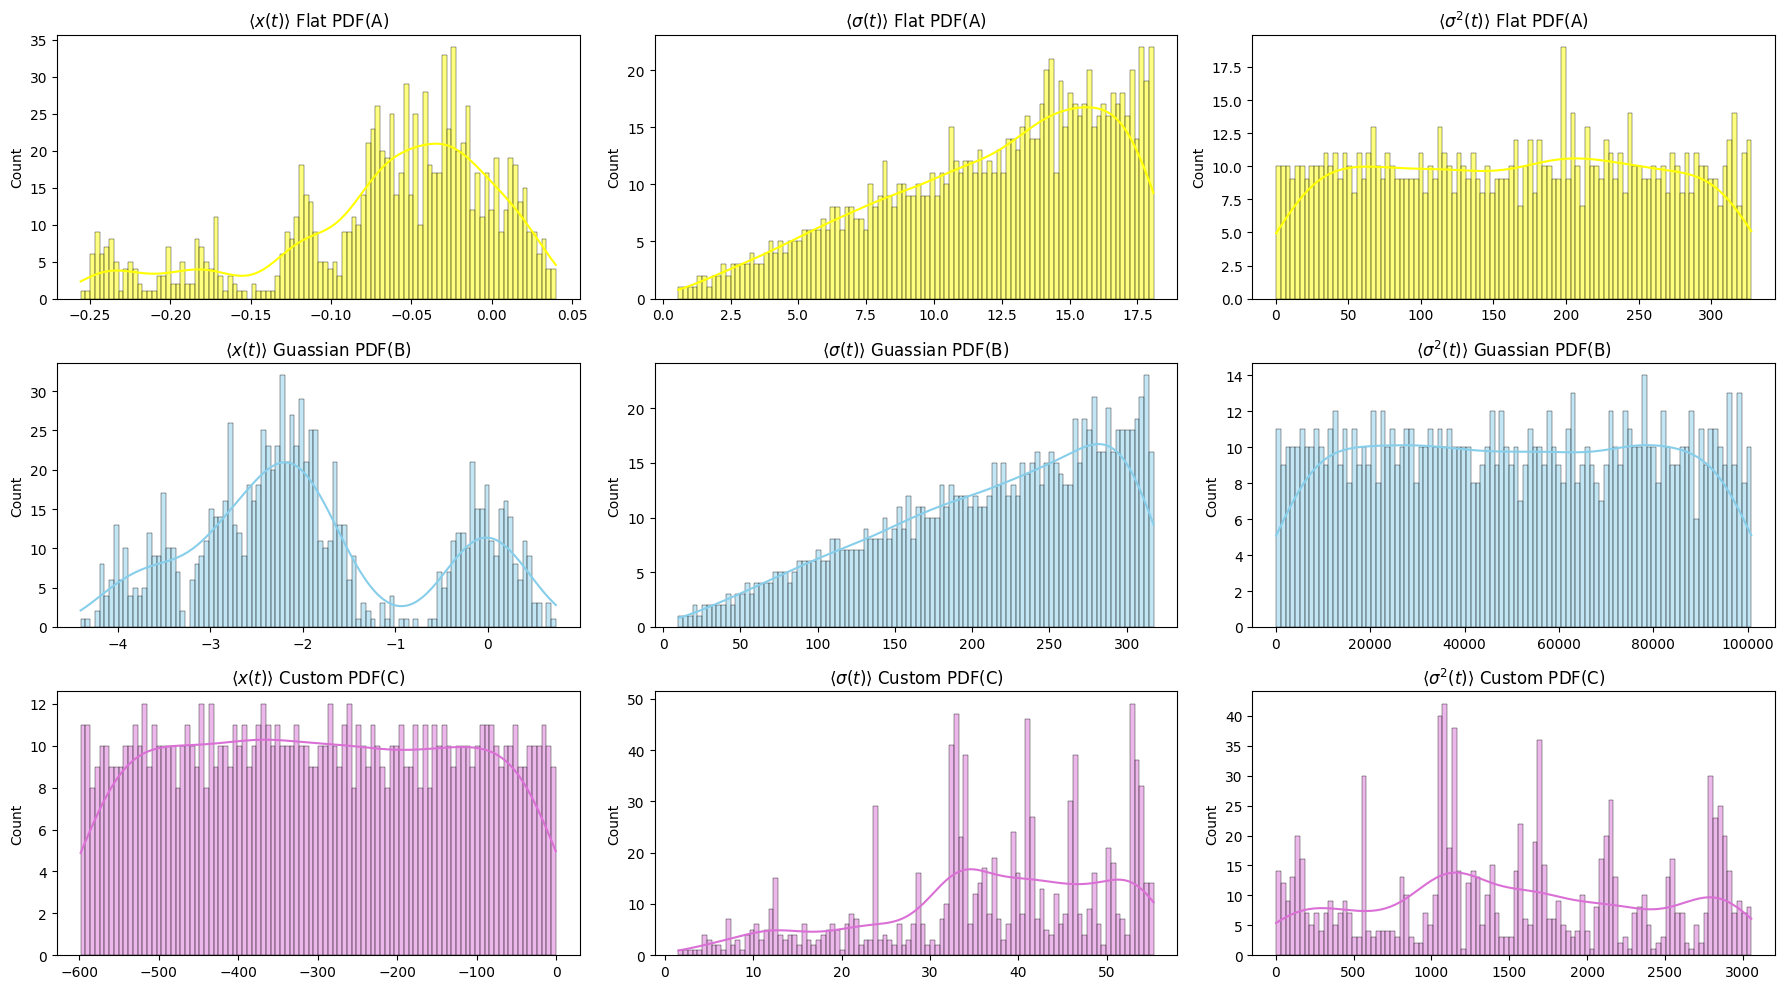

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))  # Larger figure for better spacing

# First row
sns.histplot(positions_A.mean(axis=0), kde=True, bins=100, ax=axes[0, 0], color="yellow")
axes[0, 0].set_title(r"$\langle x(t) \rangle$ Flat PDF(A)")

sns.histplot(positions_A.std(axis=0), kde=True, bins=100, ax=axes[0, 1], color="yellow")
axes[0, 1].set_title(r"$\langle \sigma(t) \rangle$ Flat PDF(A)")

sns.histplot(positions_A.var(axis=0), kde=True, bins=100, ax=axes[0, 2], color="yellow")
axes[0, 2].set_title(r"$\langle \sigma^2(t) \rangle$ Flat PDF(A)")

# Second row
sns.histplot(positions_B.mean(axis=0), kde=True, bins=100, ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title(r"$\langle x(t) \rangle$ Guassian PDF(B)")

sns.histplot(positions_B.std(axis=0), kde=True, bins=100, ax=axes[1, 1], color="skyblue")
axes[1, 1].set_title(r"$\langle \sigma(t) \rangle$ Guassian PDF(B)")

sns.histplot(positions_B.var(axis=0), kde=True, bins=100, ax=axes[1, 2], color="skyblue")
axes[1, 2].set_title(r"$\langle \sigma^2(t) \rangle$ Guassian PDF(B)")

# Third row
sns.histplot(positions_C.mean(axis=0), kde=True, bins=100, ax=axes[2, 0], color="orchid")
axes[2, 0].set_title(r"$\langle x(t) \rangle$ Custom PDF(C)")

sns.histplot(positions_C.std(axis=0), kde=True, bins=100, ax=axes[2, 1], color="orchid")
axes[2, 1].set_title(r"$\langle \sigma(t) \rangle$ Custom PDF(C)")

sns.histplot(positions_C.var(axis=0), kde=True, bins=100, ax=axes[2, 2], color="orchid")
axes[2, 2].set_title(r"$\langle \sigma^2(t) \rangle$ Custom PDF(C)")

plt.tight_layout()
plt.show()


## Explaination of the results
We observe that the violin plots of the position distributions 𝑥(𝑡) in Parts D and E reflect the characteristics of the underlying step-size PDFs. In Part D, the flat PDF leads to symmetric and uniform distributions, whereas in Part E, the custom PDF (tanh(s)/s) results in skewed and stretched distributions, as captured by the violin plots.